In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import random 

# Хи квадрат Пирсона


In [42]:
# Хи квадрат
o = np.array([18, 55, 27])
e = np.array([25, 50, 25])
sum((o - e) ** 2 / e)

2.62

In [44]:
# Хи квадрат
chisquare(o, f_exp=e)

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

In [48]:
chisquare([1020, 1040], f_exp=[1030, 1030])

Power_divergenceResult(statistic=0.1941747572815534, pvalue=0.6594644811079884)

<AxesSubplot:>

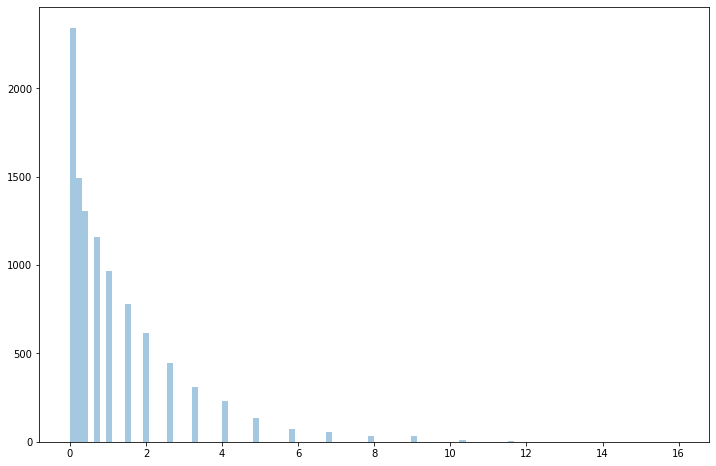

In [165]:
plt.figure(figsize=(12,8))
arr = []
for j in range(10000):
    res = [random.randint(0, 1) for i in range(100)]
    o = [res.count(0), res.count(1)]
    e = [ sum(o) // 2, sum(o) // 2]
    arr.append(chisquare(o, f_exp=e)[0])
sns.distplot(arr, bins=100, kde=False)

In [166]:
pd.Series(arr).value_counts().sort_values(ascending=False)

0.04     1532
0.16     1495
0.36     1309
0.64     1158
1.00      967
0.00      812
1.44      779
1.96      614
2.56      446
3.24      310
4.00      232
4.84      135
5.76       74
6.76       55
7.84       32
9.00       30
10.24      11
11.56       6
16.00       1
14.44       1
12.96       1
dtype: int64

In [167]:
pd.Series(arr).mean().round(2)

1.01

In [157]:
chisquare(o, f_exp=e).statistic

2.56

In [21]:
# Считаем pvalue с помощью значения x2 и степеней свободы
# stats.chi2.cdf(val, dof)
# stats.chi2.sf(val, dof) (1 - cdf) Survival function точнее cdf

a = chi2.sf(2, 2)
b = chi2.sf(4, 2)
a - b

0.23254415793482974

In [178]:
chisquare([10,10,10,5,10,15 ], f_exp=[10 for i in range(6)])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

In [183]:
chisquare([10, 30, 50], f_exp=[30, 30, 30]).statistic.round(1)

26.7

In [184]:
chisquare([15, 9], f_exp=[12, 12]).pvalue

0.22067136191984324

In [187]:
arr = [1500 * 0.53, 1500 * 0.47]
chisquare(arr, f_exp=[750, 750]).pvalue

0.02013675155034633

In [188]:
24 * 0.634

15.216000000000001

# Анализ сопряженности таблиц

In [194]:
# Вычисление ожидаемых значений
from scipy.stats import chi2_contingency
sex_table = ([15,9], [11,6])
chi2_contingency(sex_table)

(0.0,
 1.0,
 1,
 array([[15.2195122,  8.7804878],
        [10.7804878,  6.2195122]]))

In [195]:
o = np.array([18, 55, 27])
e = np.array([25, 50, 25])
chisquare(o, f_exp=e)

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

In [8]:
# Вычисление 1: x2 statistic 2: p-value 3: dfx

chi2_contingency([[15, 9], [11, 6]])

(0.0,
 1.0,
 1,
 array([[15.2195122,  8.7804878],
        [10.7804878,  6.2195122]]))

In [11]:
# Пример
bio = [15, 9]
inf = [11, 6]
ch2_val, p_val, df, e_arr = chi2_contingency([bio, inf], correction=True)
print(f'''Хи квадрат : {ch2_val}
P-value : {p_val}
deg of free : {df}
e_arr : {e_arr}
''')

Хи квадрат : 0.0
P-value : 1.0
deg of free : 1
e_arr : [[15.2195122  8.7804878]
 [10.7804878  6.2195122]]



In [15]:
from scipy.stats import chi2_contingency

observed_values = [[15, 9], [11, 6]]
chi2, p_value, ddof, expected = chi2_contingency(observed_values)

print(ddof)  # степени свободы

print(expected)  # ожидаемые значения
print(chi2)  # Хи-квадрат

1
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]
0.0


# Задачи


In [16]:
chi2_contingency([[20, 15], [11, 12], [7, 9]], correction=True)

(0.9544070774762996,
 0.6205162173513055,
 2,
 array([[17.97297297, 17.02702703],
        [11.81081081, 11.18918919],
        [ 8.21621622,  7.78378378]]))

In [35]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
patients = pd.DataFrame({"Thrombosis": ["Yes","Yes","Yes","Yes","Yes","Yes",
                                        "Yes","Yes","Yes","Yes","Yes","Yes",
                                        "Yes","Yes","Yes","Yes","Yes","Yes",
                                        "Yes","Yes","Yes","Yes","Yes","Yes",
                                        "No","No","No","No","No","No","No",
                                        "No","No","No","No","No","No","No",
                                        "No","No","No","No","No","No"], 
                         "Group": ["Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Aspirin","Aspirin",
                                   "Aspirin","Aspirin","Aspirin","Aspirin",
                                   "Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Placebo","Aspirin",
                                   "Aspirin","Aspirin","Aspirin","Aspirin",
                                   "Aspirin","Aspirin","Aspirin","Aspirin",
                                   "Aspirin","Aspirin","Aspirin","Aspirin"]})


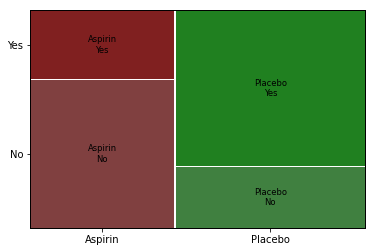

In [54]:
#посмотрим на сводную таблицу пересечения признаков
pivot = pd.pivot_table(patients, index=["Group"], columns=["Thrombosis"], aggfunc=lambda x: len(x))
#обращаем внимание на stack() 

mosaic(pivot.stack())
plt.show()

<Figure size 720x576 with 0 Axes>

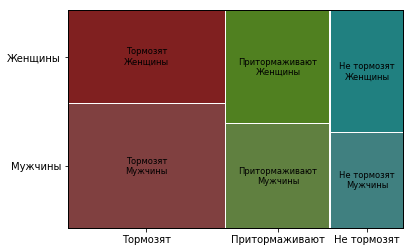

In [53]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

tab = pd.DataFrame({
    'Мужчины': [20, 11, 7],
    'Женщины': [15, 12, 9]
})

tab.index = ('Тормозят', 'Притормаживают', 'Не тормозят')

plt.figure(figsize=(10, 8))
mosaic(tab.stack())
plt.show()

# Критерий Фишера


In [5]:
from scipy import stats

In [6]:
# 1 возвр значение вероятность, 2 значение p_value 
stats.fisher_exact([[3,1], [1, 3]])

(9.0, 0.48571428571428565)

# Задачи


In [89]:
def nan_position(arr1, arr2):
    df = pd.DataFrame({'x': arr1,
                      'y': arr2})
    return (df.x.isna() == df.y.isna()).all()

In [88]:
nan_position([1, 2, None], [3, 4, None])

(True,
      x    y
 0  1.0  3.0
 1  2.0  4.0
 2  NaN  NaN)

In [79]:
nan_position([None, 2, None], [3, 4, None])

False

In [80]:
nan_position([1, 2, 3], [3, 4, 6])

True